### Tarefa 04: Análise de variância de ativos financeiros (ANOVA)

Aluno: Eduardo de Oliveira Castro

Matrícula: 210008164

- A Tarefa dar-se-á na análise entre as médias de diferentes ativos, ou carteira versus índice de mercado, ou ativos versus carteira, etc. Cabendo ao aluno escolher a comparação das médias. 
- É ideal que seja feita análise das questões de heterocedasticidades, faça-se as devidas correções e compare as médias por grupos e entre grupos. 
- Para o trabalho, decidi utilizar uma comparação do fechamento do índice BOVESPA nos últimos XX meses.


### Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize 

In [2]:
# B2W, Lojas Americanas, Magazine Luiza, Mercado Livre, Amazon e Índice Bovespa
acoes = ["^BVSP"]#"AMER3.SA", "LAME4.SA", "MGLU3.SA", "MELI34.SA", "AMZO34.SA", 

# Criação de um dataframe
acoes_df = pd.DataFrame()

# For para popular o Dataframe com os dados de fechamento da bolsa de valores de cada dia, desde 2015, coletados do Yahoo
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, data_source="yahoo", start="1994-01-01", end="2021-09-09")['Close']

# Criação de um CSV para salvar esses dados
acoes_df.to_csv("carteira_tarefa4.csv")
# Impressão da tabela
acoes_df

,^BVSP
Date,
1994-01-03,380.100006
1994-01-04,400.600006
1994-01-05,421.100006
1994-01-06,444.200012
1994-01-07,476.399994
...,...
2021-09-02,116677.000000
2021-09-03,116933.000000
2021-09-06,117869.000000


### Começa a ler a partir do CSV gerado

In [3]:
# Leitura do csv
acoes_df = pd.read_csv("carteira_tarefa4.csv",index_col='Date', parse_dates=True)

### Imprime descritivo estatístico simples do dataframe gerado, exibindo tendência, dispersão, valores máximos e mínimos, shape, etc.

In [4]:
acoes_df.describe()

,^BVSP
count,6843.000000
mean,42532.269955
std,31305.226073
min,380.100006
25%,12664.000000
50%,44336.000000
75%,62453.000000
max,130776.000000


### Visualização do histórico de fechamento do IBOV

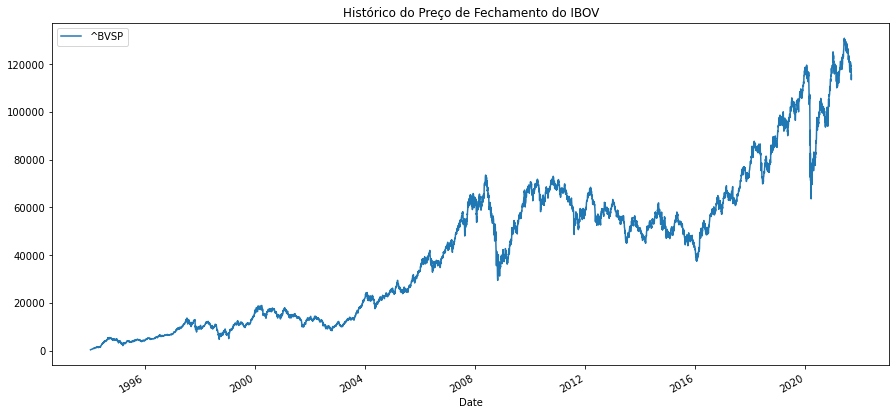

In [5]:
acoes_df.plot(figsize = (15,7), title='Histórico do Preço de Fechamento do IBOV');

### Naturalmente, os dados encontram se desnormalizados e desajustados para a realidade dos tempos atuais. Uma alternativa para solucionar este problema poderia ser a normalização como feito no exercício passado ou podemos utillizar o método pct_change() da biblioteca pandas para calcular a % de mudança entre o fechamento de um dia com o outro.

In [6]:
retorno_diario = acoes_df["^BVSP"].pct_change()
retorno_diario.dropna(inplace=True)
retorno_diario

Date
1994-01-04    0.053933
1994-01-05    0.051173
1994-01-06    0.054856
1994-01-07    0.072490
1994-01-10    0.039882
                ...   
2021-09-02   -0.022773
2021-09-03    0.002194
2021-09-06    0.008005
2021-09-08   -0.037805
2021-09-09    0.017176
Name: ^BVSP, Length: 6842, dtype: float64

### O próximo passo envolve a anualização desses valores como uma forma de obtermos a volatilidade mensal anualizada.

In [7]:
anualizacao_mensal = retorno_diario.resample('M').std()* np.sqrt(12)

print(anualizacao_mensal.head())

Date
1994-01-31    0.119613
1994-02-28    0.204426
1994-03-31    0.132332
1994-04-30    0.191808
1994-05-31    0.179305
Freq: M, Name: ^BVSP, dtype: float64


### Ao plotar o gráfico com os dados, somos capazes de verificar períodos de alta volatilidade no fechamento do índice correspondendo aos períodos de crise em que o país enfrentou, tal como a crise de 2008 que afetou mercados globais e a crise de 2020 por conta da pandemia do coronavírus.

Text(0.5, 1.0, 'Valor mensal anualizado com destaque aos últimos períodos de grande volatilidade que tivemos')

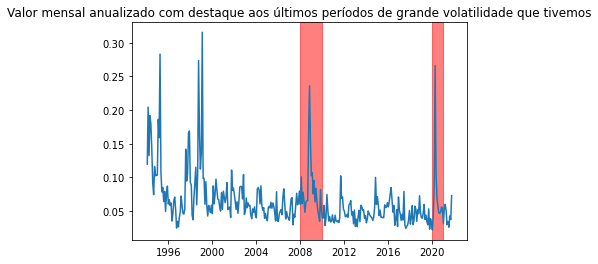

In [8]:
plt.plot(anualizacao_mensal)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
plt.title('Valor mensal anualizado com destaque aos últimos períodos de grande volatilidade que tivemos')

### Para aprofundarmos a análise, o próximo passo envolve a transformação da volatilidade mensal anualizada para a volatilidade mensal média utilizando o método groupby e o método rank para cada um dos meses da amostra. Dessa forma, somos capazes de verificar que o mês com maior volatilidade é março (3) e o mês com menor volatilidade é dezembro (12). 

In [9]:
volatilidade_mensal_media = anualizacao_mensal.groupby(anualizacao_mensal.index.year).rank()
volatilidade_mensal_media_final = volatilidade_mensal_media.groupby(volatilidade_mensal_media.index.month).mean()
volatilidade_mensal_media_final

Date
1     7.071429
2     7.392857
3     7.571429
4     6.285714
5     6.928571
6     6.428571
7     5.107143
8     5.928571
9     5.964286
10    7.259259
11    6.888889
12    4.666667
Name: ^BVSP, dtype: float64

### Agora, para facilitar a verificação de qual mês tem maior ou menor volatilidade, printaremos um gráfico de barras contendo a média de volatilidade para cada um dos 12 meses do ano desde o início da amostra, em 1994, até os dias atuais:

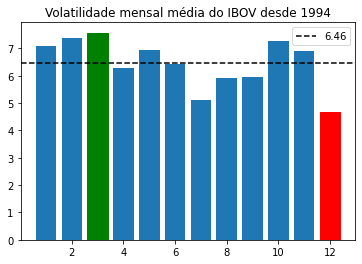

In [10]:
grafico_media = plt.bar(x=volatilidade_mensal_media_final.index,height=volatilidade_mensal_media_final)
grafico_media[2].set_color('g')
grafico_media[11].set_color('r')

plt.axhline(volatilidade_mensal_media_final.mean(),ls='--',color='k',label=round(volatilidade_mensal_media_final.mean(),2))
plt.title('Volatilidade mensal média do IBOV desde 1994')

plt.legend()
plt.show()

### Entretanto, também é importante que seja analisado o desvio da média mais signicativo e não apenas a maior volatilidade, como fizemos anteriormente. Para tanto, utilizamos o método abs e fomos capazes de observar que o maior desvio encontra-se no mês de Dezembro (12), seguido por Julho (7) e, por fim, por março (3), que conforme demonstrado anteriormente é o mês de maior volatilidade média.

In [11]:
abs_ = abs(volatilidade_mensal_media_final - volatilidade_mensal_media_final.mean())
abs_.sort_values()

Date
6     0.029211
4     0.172068
11    0.431107
5     0.470789
9     0.493496
8     0.529211
1     0.613646
10    0.801477
2     0.935075
3     1.113646
7     1.350639
12    1.791116
Name: ^BVSP, dtype: float64

### Com fito de facilitar essa análise, plotei um gráfico contendo os dados supracitados:

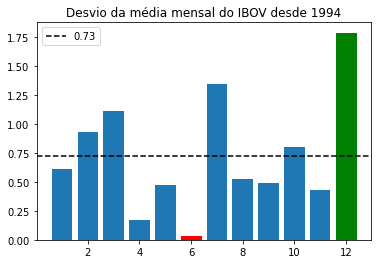

In [12]:
grafico_media = plt.bar(x=abs_.index,height=abs_)
grafico_media[11].set_color('g')
grafico_media[5].set_color('r')

plt.axhline(abs_.mean(),ls='--',color='k',label=round(abs_.mean(),2))
plt.title('Desvio da média mensal do IBOV desde 1994')

plt.legend()
plt.show()

### Para cálculo do p-valor, criamos um segundo dataframe para atuar enquanto nossa hipótese nula rutilizando o anterior mas com valores aleatoriezados graças ao método sample e seguimos o mesmo procedimento dos trechos de códigos anteriores para que possamos ter uma tabela comparável. Porr fim, calculamos o p-value utilizando como rreferência o mês de dezembro (12), haja vista que nossa amostra demonstrou que ele é o mês com o maiorr desvio da média mensal.

In [13]:
acoes_df_new = pd.DataFrame()
maiores_valores = []

count=0
n=1000

for iterador in range(n):
    retorno_diario_aleatorio = retorno_diario.sample(6842).reset_index(drop=True)

    retorno_diario_aleatorio.index = (pd.bdate_range(start='1994-01-03',periods=6842))

    anualizacao_mensal = retorno_diario_aleatorio.resample('M').std()* np.sqrt(12)

    volatilidade_mensal_media = anualizacao_mensal.groupby(anualizacao_mensal.index.year).rank()
    volatilidade_mensal_media_final = volatilidade_mensal_media.groupby(volatilidade_mensal_media.index.month).mean()
    
    acoes_df_new = pd.concat([acoes_df_new,volatilidade_mensal_media_final],axis=1)

    maior_mes = max(volatilidade_mensal_media_final)
    maiores_valores.append(maior_mes)


todos_os_meses = acoes_df_new.values.flatten()
todos_os_meses_media = todos_os_meses.mean()
todos_os_meses_abs = abs(todos_os_meses-todos_os_meses_media)    

count=0

for iterador in todos_os_meses_abs:
    if iterador > abs_[12]:
        count += 1

p_value = count/len(todos_os_meses_abs)        

print('p-value:', p_value)

p-value: 0.008166666666666666


### E, por fim, repetimos o mesmo procedimento para cálculo do p-value mas, dessa vez, utilizando como referência a variável maior_valor_abs:

In [14]:
maiores_valores_media = np.mean(maiores_valores)
maior_valor_abs = [abs(x - todos_os_meses_media) for x in maiores_valores]

count=0

for iterador in maior_valor_abs:
    if iterador > abs_[12]:
        count += 1

ans = count/len(maior_valor_abs)        

print('p-value:', ans )

p-value: 0.032
